# Project: **A Classification Model of Restaurant Reviews through Natural Language Processing**
_____

Author: **Daniel Eduardo López**

#####<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"> LinkedIn </a> 

#####<a href="https://github.com/DanielEduardoLopez"> GitHub </a>



### **1. Goal**

To develop several bag-of-words models for classificating restaurant reviews into positive or negative through Natural Language Processing (NLP) and selecting the one with the highest accuracy rate.
___
### **2. Research Question**

Which bag-of-words model for classificating restaurant reviews into positive or negative is able to yield the highest accuracy?
___
### **3. Hypothesis**

A bag-of-words model based on **Random Forests** for classificating restaurant reviews into positive or negative will yield the highest accuracy.
___
### **4. Methodology**

The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Building and evaluation of classification models.
2. **Data requirements**: Reviews of a restaurant and their corresponding labels (0 for negative and 1 for positive).
3. **Data collection**: Data was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data then was cleaned with Python 3 and its libraries Numpy, Pandas, Regular Expressions, and the Natural Language Toolkit.
5. **Data modeling**: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Trees, Random Forests, and XGBoost classifications models were fitted and tunned using Python 3 and its libraries Numpy, Pandas, and Sklearn. 
6. **Evaluation**: The models were primarily evaluated through the accuracy rate, but also by using confusion matrices and classification reports.
___

### **5. Results**

#### **5.1 Data Collection**
As mentioned before, data about restaurant reviews and its corresponding labels was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.

In [59]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
# Setting Seaborn Theme
sns.set_theme(context = "notebook", style ="darkgrid")

In [61]:
# Setting Plot format to SVG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [62]:
# Reading data from source
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/RestaurantReviews/61343b57c96225bc512445d33b93ecf9daafef33/Restaurant_Reviews.tsv', sep = "\t", quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### **5.2 Data Exploration**
The data was explored to identify its general features and characteristics.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Dataset consists of 1000 annotated reviews.

In [64]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [65]:
x = df.Liked.value_counts()
print(f"The amount positive reviews is {x[1]}. And the amount of negative reviews is {x[0]}.")

The amount positive reviews is 500. And the amount of negative reviews is 500.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Reviews')

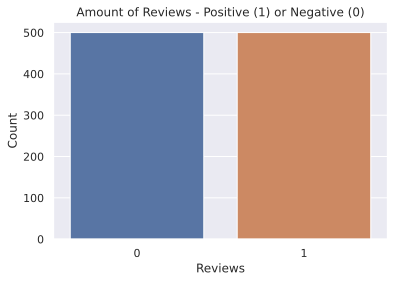

In [66]:
plt.title("Amount of Reviews - Positive (1) or Negative (0)")
# Bar chart showing amount of both target values
sns.barplot(x.index, x)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Reviews")

There is the same amount of Positive and Negative reviews.

In [94]:
# Create a new feature with text lenght, or number of characters
df['Length'] = df['Review'].str.len()
# Create a new feature with number of words
df['Num_words'] = df['Review'].str.split().map(lambda x: len(x))
df.head()

,Review,Liked,length,num_words,Length,Num_words
0,Wow... Loved this place.,1,24,4,24,4
1,Crust is not good.,0,18,4,18,4
2,Not tasty and the texture was just nasty.,0,41,8,41,8
3,Stopped by during the late May bank holiday of...,1,87,15,87,15
4,The selection on the menu was great and so wer...,1,59,12,59,12


In [95]:
# Text length summary by target
df.groupby(['Liked']).Length.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,60.75,34.224935,11.0,33.00,52.5,84.00,149.0
1,500.0,55.88,30.219464,11.0,32.75,49.5,73.25,148.0


Negative reviews tend to be longer than positive reviews.

Text(0.5, 1.0, 'Positive Review')

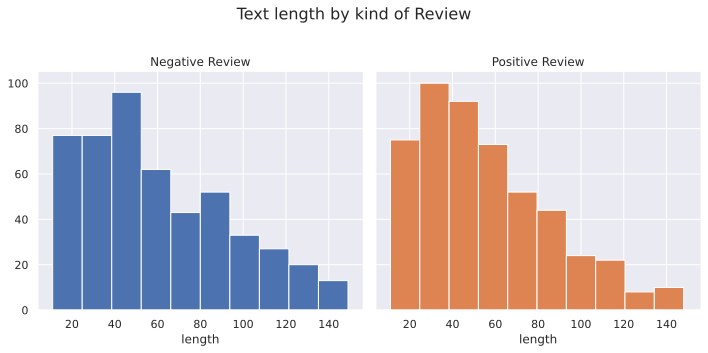

In [69]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked')
# Plot a histogram chart
g.map(plt.hist, "length")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Text length by kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")
     

In [70]:
# Number of words summary by target
df.groupby(['Liked']).num_words.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,11.498,6.611916,2.0,6.0,10.0,16.00,32.0
1,500.0,10.290,5.825958,1.0,6.0,9.0,13.25,32.0


Likewise, negative reviews tend to have more words than positive reviews.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Positive Review')

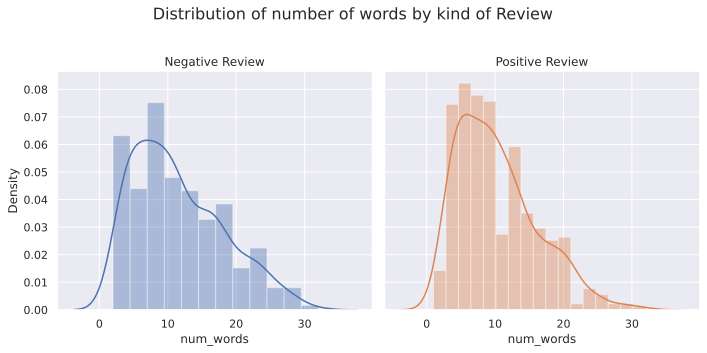

In [71]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked')
# Plot a histogram chart
g.map(sns.distplot, "num_words")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Distribution of number of words by kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")   


Text(0.5, 0, 'Kind of Review')

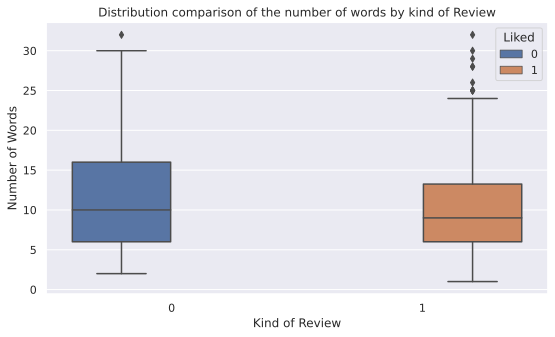

In [72]:
# Boxplot for comparing distribution of number of words by Kind of Review
plt.figure(figsize=(9,5))
# Add title
plt.title("Distribution comparison of the number of words by kind of Review")
# Boxplot
sns.boxplot(x = "Liked", y = "num_words", hue="Liked", data = df)
# Add label for vertical axis
plt.ylabel("Number of Words")
# Add label for hotizontal axis
plt.xlabel("Kind of Review")

Indeed, according to the boxplot, the negative reviews have more words than the positive ones.

In [73]:
# Function to count unique words
from collections import Counter

def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [74]:
# Unique words
text_values = df["Review"]

counter = counter_word(text_values)
print(f"The training dataset has {len(counter)} unique words")

The training dataset has 2967 unique words


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 <a list of 6 Text major ticklabel objects>)

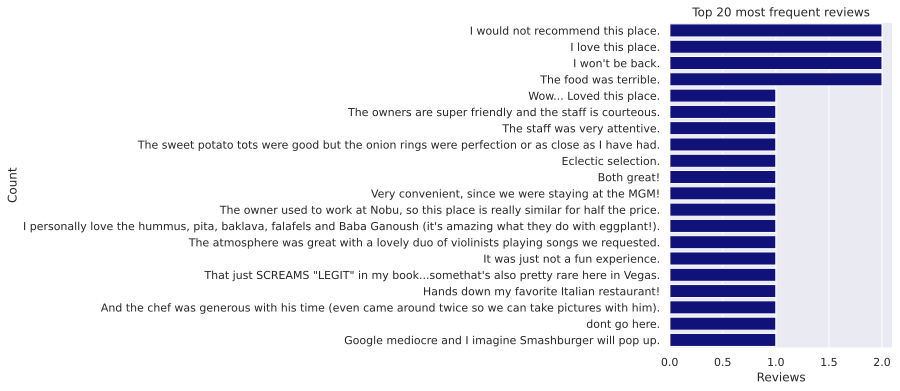

In [96]:
# Groups the top 20 reviews
x = df.Review.value_counts()[:20]
# Set the width and height of the figure
plt.figure(figsize=(4,6))
# Add title
plt.title("Top 20 most frequent reviews")
# Bar chart showing amount of both target values
sns.barplot(x, x.index, color = "darkblue")
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Reviews")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=0)

In [76]:
from nltk.corpus import stopwords
import itertools

all_words = []
for text in df.Review: 
    # Convert each review to string type 
    text = str(text).lower()
    # Split the review into its constituent words 
    words = text.split() 
    # Removing stopwords from the reviews
    words = [word for word in words if not word in set(stopwords.words('english'))]
    all_words.append(words)

all_words = list(itertools.chain.from_iterable(all_words))

values = pd.Series(all_words).value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

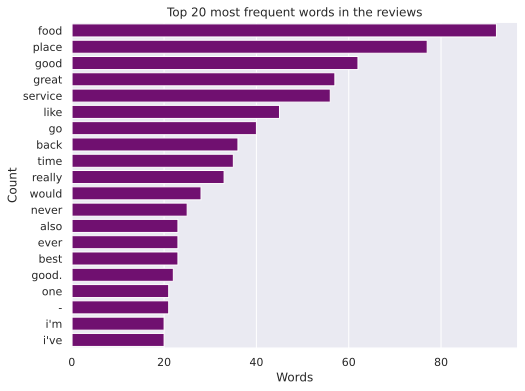

In [87]:
# Groups the top 20 words
x = values[:20]
# Set the width and height of the figure
plt.figure(figsize=(8,6))
# Add title
plt.title("Top 20 most frequent words in the reviews")
# Bar chart showing amount of both target values
sns.barplot( x, x.index, color = "purple")
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Words")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=0)

In [92]:
# Function to create a Word Cloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

STOPWORDS.add('NaN')  # remove NaN to the World Cloud
STOPWORDS.add('https') # remove https to the World Cloud

def create_word_cloud(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # convert each val to string type 
        val = str(val)
        # split the value 
        tokens = val.split() 
        # Converts each token to lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
            
    wordcloud = WordCloud(width = 800, height = 400,
                    background_color ='white',
                    #mask = maskArray,      
                    stopwords = stopwords,
                    min_font_size = 10)
    wordcloud.generate(comment_words)   
    
    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()   

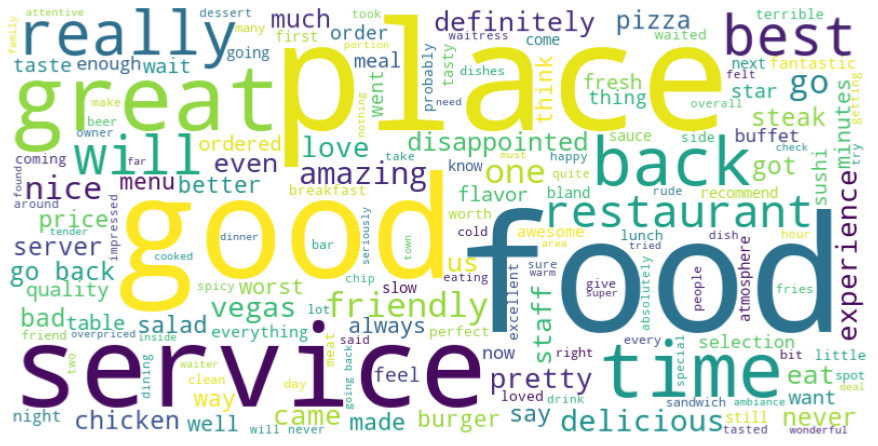

In [93]:
# Create a WordCloud from Reviews
text = df.Review.values
create_word_cloud(text)

#### **5.3 Data Preparation**
The text was cleaned and  prepared for the subsequent modeling.

In [80]:
# Libraries importation
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
corpus = []
for i in range(0, 1000):
    text = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

corpus[:11]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt']

#### **5.4 Data Modeling**
Several bag-of-words models for classificating restaurant reviews into positive or negative were crafted in this section.

In [82]:
# Bag-of-Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

### **6. Conclusions**

### **7. References**
* **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* https://www.ibm.com/downloads/cas/WKK9DX51

In [83]:
# End